[('Atmosfear', 27747), ('Keimosaurus Big Spin', 18789), ('Galactosaurus Rage', 18712), ('Wrightiraptor Mountain', 18700), ('Auvilotops Express', 18694), ('Flight of the Swingodon', 16093), ('Firefall', 16020), ('Wendisaurus Chase', 15571), ('TerrorSaur', 14407)]


<Figure size 720x504 with 0 Axes>

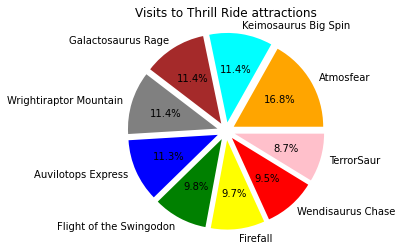

In [2]:
import sqlite3
import datetime
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd



connection = sqlite3.connect(r'C:\Users\Danish\Desktop\dinofunworld.db')
current_cursor = connection.cursor()
def execute_query_and_fetch(query):
    return current_cursor.execute(query).fetchall();
def execute_query_and_fetchone(query):
    return current_cursor.execute(query).fetchone()[0]
    

count_visits=execute_query_and_fetch("select attraction.Name, count(checkin.visitorId) as count from checkin left join attraction where checkin.attraction = attraction.AttractionID and lower(attraction.Category) LIKE '%thrill rides%' and duration not like 'NULL' group by attraction.Name order by count desc;")

print(count_visits)



a=[]
b=[]
for i in count_visits:
    a.append(i[1])
    b.append(i[0])
    
    
fig=plt.figure(figsize=(10,7))

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1 ,0.1 , 0.1)
colors_list = ("orange", "cyan", "brown", 
          "grey" ,"blue","green","yellow","red","pink")
fig1, ax1 = plt.subplots()

ax1.pie(a, colors = colors_list, explode=explode, labels=b,autopct='%0.1f%%')

plt.axis('equal')
plt.title('Visits to Thrill Ride attractions')
plt.show()



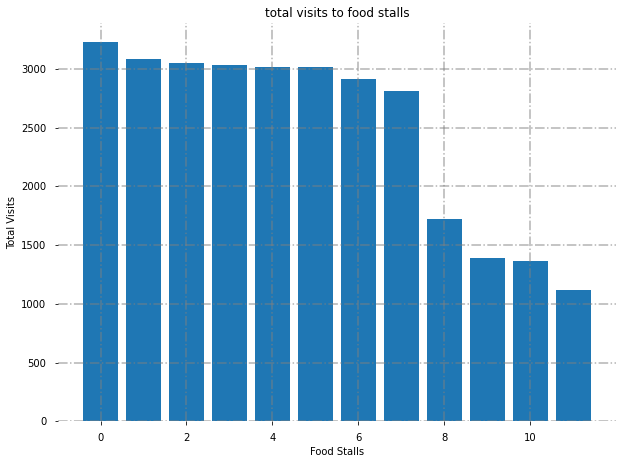

In [3]:
import warnings
warnings.filterwarnings('ignore')
count_visits=execute_query_and_fetch("select attraction.Name, count(checkin.visitorId) as count from checkin left join attraction on checkin.attraction = attraction.AttractionID where lower(attraction.Category) LIKE '%food%' and duration not like 'NULL' group by attraction.Name order by count desc;")

a=[]
b=[]
for i in count_visits:
    a.append(i[1])
    b.append(i[0])

fig, ax = plt.subplots(figsize=(10,7))

# Remove axes splines
positions =['top','bottom','left','right']
for i in positions:
    ax.spines[i].set_visible(False)

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=8)
ax.yaxis.set_tick_params(pad=8)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1.5, alpha=0.6)

plt.bar(range(len(a)),a)


plt.ylabel('Total Visits')
plt.xlabel('Food Stalls')
plt.rcParams['axes.grid'] = False  


plt.title('total visits to food stalls')
plt.subplots_adjust(bottom = 0.09)
plt.show()


8
[[0, 0], [1, 0], [2, 9], [3, 19], [4, 49], [5, 62], [6, 46], [7, 44], [8, 33], [9, 75], [10, 81], [11, 98], [12, 75], [13, 89], [14, 80], [15, 85], [16, 52], [17, 82], [18, 80], [19, 103], [20, 108], [21, 93], [22, 68], [23, 90], [24, 89], [25, 117], [26, 108], [27, 81], [28, 89], [29, 94], [30, 87], [31, 85], [32, 82], [33, 97], [34, 100], [35, 137], [36, 142], [37, 134], [38, 109], [39, 138], [40, 142], [41, 157], [42, 164], [43, 176], [44, 78], [45, 73], [46, 62], [47, 77], [48, 73], [49, 99], [50, 118], [51, 109], [52, 108], [53, 106], [54, 100], [55, 134], [56, 90], [57, 83], [58, 78], [59, 96], [60, 95], [61, 102], [62, 133], [63, 97], [64, 110], [65, 121], [66, 134], [67, 102], [68, 101], [69, 114], [70, 103], [71, 123], [72, 87], [73, 111], [74, 140], [75, 129], [76, 103], [77, 94], [78, 53], [79, 43], [80, 53], [81, 76], [82, 78], [83, 53], [84, 73], [85, 82], [86, 104], [87, 91], [88, 84], [89, 89], [90, 81], [91, 64], [92, 65], [93, 70], [94, 80], [95, 90], [96, 93], [97, 

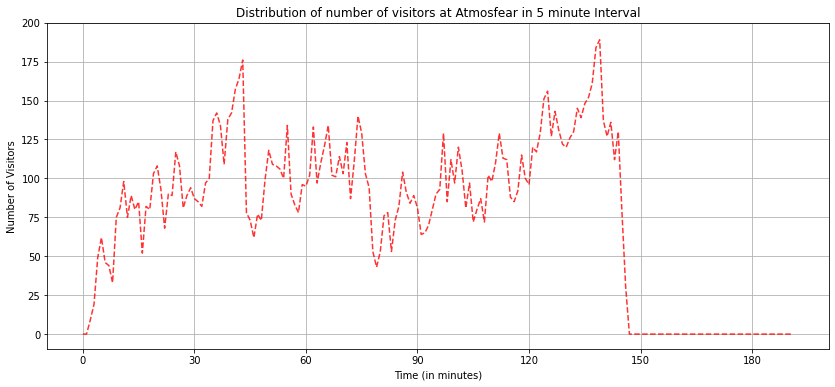

In [4]:
result = execute_query_and_fetch("select AttractionID, Name from attraction where Name like '%Atmosfear%'");
ans = result[0][0]
print(ans)
sequence = execute_query_and_fetch("select visitorID,sequence from sequences");

d={}
for i in range(192):
    d[i] = {"time":i,"count":0}

for i in sequence:
    new_i=i[1].split("-")[:192]
    for j in range(len(new_i)):
        if(int(new_i[j]) == 8):  #result[0][0]==8==ans
            d[j]["count"]+=1

d2 = []
for i in d:
    d2.append(d[i])
a=[]
b=[]
c=[]
for i in sorted(d2,key=lambda i: i["time"]):
    x=i["time"]
    y=i["count"]
    a.append(x)
    b.append(y)
    c.append([x,y])
print(c)
x_ticks_value = [];
y_ticks_value = [];

for i in range(0,192,30):
    x_ticks_value.append(i);
for i in range(0,221,25):
    y_ticks_value.append(i);


fig, var = plt.subplots(figsize=(14, 6))
var.plot(a,b,linestyle="dashed",alpha=0.8,color="red");
plt.xticks(x_ticks_value)
plt.yticks(y_ticks_value)
plt.title("Distribution of number of visitors at Atmosfear in 5 minute Interval");
var.set_xlabel('Time (in minutes)')
var.set_ylabel('Number of Visitors')

plt.grid()
plt.show();


[4062, 4022, 3963, 3925, 3922, 3877, 3759, 3747, 3704, 3640, 3560]


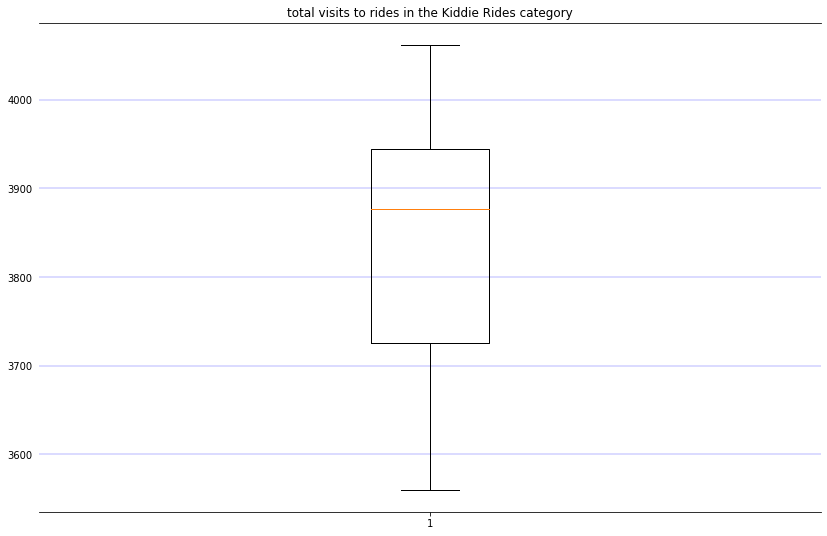

In [5]:
visit_count = execute_query_and_fetch("select attraction.Name, count(checkin.visitorId) as count from checkin left join attraction where checkin.attraction = attraction.AttractionID and lower(attraction.Category) LIKE '%Kiddie rides%' and duration not like 'NULL' group by attraction.Name order by count desc;")

ans=[];
for i in visit_count:
    ans.append(i[1])
print(ans)
#customizing the boxplot

fig, ax = plt.subplots(figsize=(14, 9))
# Remove top and right border
ax.spines['top'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Set plot title
ax.set_title('total visits to rides in the Kiddie Rides category')
# Add major gridlines in the y-axis
ax.grid(color='blue', axis='y', linestyle='-', linewidth=0.35, alpha=0.8)

plt.boxplot(ans)
plt.show()